# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print("Number of mice:", num_mice)

Number of mice: 249


In [10]:
# Find duplicate rows based on Mouse ID and Timepoint columns
duplicate_mice = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]

# Get the Mouse IDs of the duplicate mice
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()

# Print the duplicate Mouse IDs
print("Duplicate Mouse IDs:", duplicate_mice_ids)

Duplicate Mouse IDs: ['g989']


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
# Find duplicate rows based on Mouse ID and Timepoint columns
duplicate_mice = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]

# Get all data for the duplicate mouse IDs
duplicate_mice_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice["Mouse ID"])]

# Display the data for the duplicate mouse IDs
print(duplicate_mice_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [12]:
# Drop duplicate rows based on Mouse ID
clean_data = merged_data.drop_duplicates(subset="Mouse ID", keep="first")

# Display the clean DataFrame
print(clean_data)


     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0                 0  
10                  45.0         

In [13]:
num_mice_clean = clean_data["Mouse ID"].nunique()
print("Number of mice in the clean DataFrame:", num_mice_clean)

Number of mice in the clean DataFrame: 249


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by drug regimen and calculate the required statistics
summary_stats = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={"mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Deviation", "sem": "SEM"})

# Display the summary statistics table
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Generate the summary statistics table using the agg method
summary_stats = merged_data.groupby("Drug Regimen").agg(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Standard_Deviation=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem')
)

# Display the summary statistics table
print(summary_stats)

                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

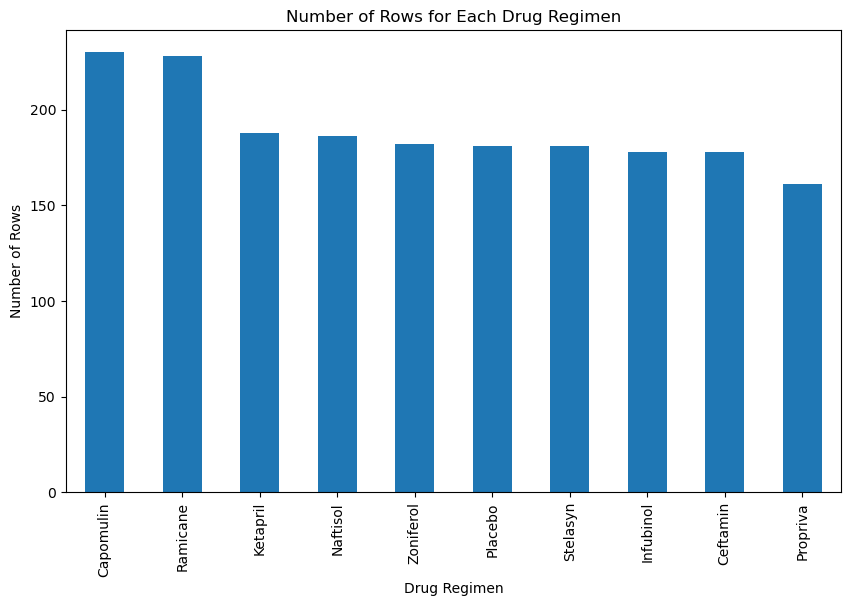

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Calculate the count of rows for each drug regimen
regimen_counts = merged_data["Drug Regimen"].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title("Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Display the plot
plt.show()


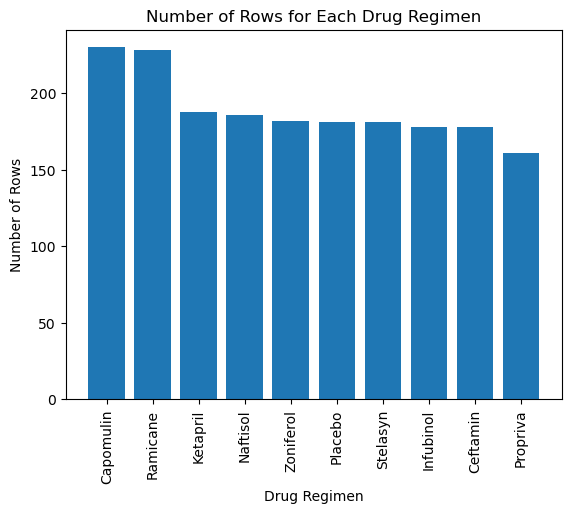

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = merged_data["Drug Regimen"].value_counts()

# Get the x-axis values (drug regimens)
x_values = regimen_counts.index

# Get the y-axis values (row counts)
y_values = regimen_counts.values

# Create the bar plot
plt.bar(x_values, y_values)

# Set the title and labels
plt.title("Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=90)

# Display the plot
plt.show()

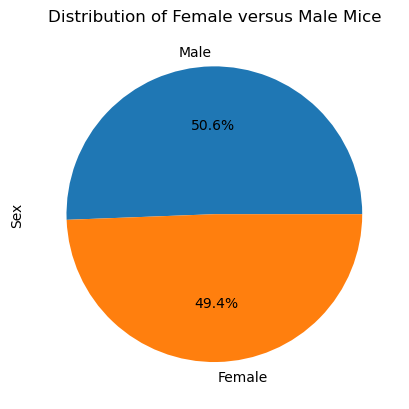

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the count of female and male mice
sex_counts = merged_data["Sex"].value_counts()

# Create a pie plot
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0)

# Set the title
plt.title("Distribution of Female versus Male Mice")

# Display the plot
plt.show()

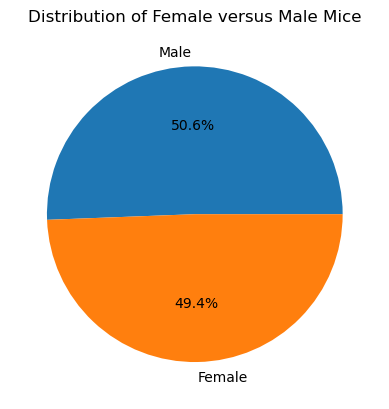

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Calculate the count of female and male mice
sex_counts = merged_data["Sex"].value_counts()

# Create a pie plot
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=0)

# Set the title
plt.title("Distribution of Female versus Male Mice")

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merge the max_timepoint_df with the original DataFrame on Mouse ID and Timepoint
# Group the data by Mouse ID and find the maximum timepoint
max_timepoint = merged_data.groupby("Mouse ID")["Timepoint"].max()

# Convert the result to a DataFrame and reset the index
max_timepoint_df = pd.DataFrame({"Timepoint": max_timepoint}).reset_index()
# Merge the max_timepoint_df with the original DataFrame on Mouse ID and Timepoint
final_tumor_volume = pd.merge(merged_data, max_timepoint_df, on=["Mouse ID", "Timepoint"])

# Filter for the four treatment regimens of interest
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_regimens)]

# Display the final tumor volume data
print(final_tumor_volume)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
4       g791     Ramicane    Male          11          16         45   
..       ...          ...     ...         ...         ...        ...   
235     x822     Ceftamin    Male           3          29         45   
237     y163    Infubinol  Female          17          27         45   
241     y769     Ceftamin  Female           6          27         45   
242     y865     Ceftamin    Male          23          26         45   
246     z581    Infubinol  Female          24          25         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2  

In [21]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

    
# Put treatments into a list
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to store potential outliers
outliers = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # Calculate the quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])

    # Determine outliers using upper and lower bounds
    treatment_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Add outliers to the list
    outliers.extend(treatment_outliers)

    # Print the treatment and its potential outliers
    print(f"{treatment}'s potential outliers: {treatment_outliers}")

# Display all potential outliers
print("All potential outliers:", outliers)


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
All potential outliers: [36.3213458]


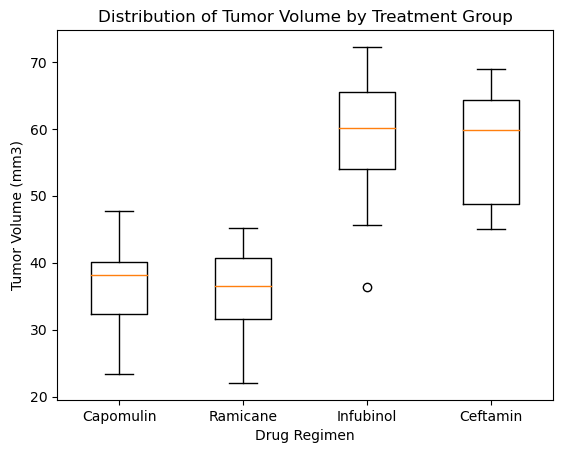

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

import matplotlib.pyplot as plt

# Create a list of tumor volume data for each treatment group
tumor_volume_data = [
    final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"],
    final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"],
    final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"],
    final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]
]

# Create a figure and axes
fig, ax = plt.subplots()

# Generate the box plot
ax.boxplot(tumor_volume_data)

# Set the x-axis tick labels
ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# Set the title and labels
ax.set_title("Distribution of Tumor Volume by Treatment Group")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()


## Line and Scatter Plots

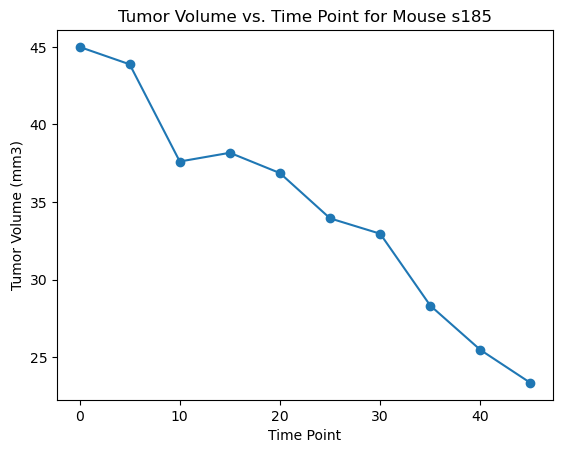

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Filter data for mouse "s185"
mouse_data = merged_data.loc[merged_data["Mouse ID"] == "s185"]

# Plot the tumor volume versus time point
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o')

# Set the title and labels
plt.title("Tumor Volume vs. Time Point for Mouse s185")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()



In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(capomulin_data, mouse_metadata, on="Mouse ID")

# Create the scatter plot
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

# Set the title and labels
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()


KeyError: 'Weight (g)'

## Correlation and Regression

In [6]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


KeyError: 'Drug Regimen'